# Metadataset trends
- This is all preliminary / proof of concept, since we don't have the final data yet

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# special import (so that ReczillaClassifier can be imported)
import os
import sys
HOME = os.environ.get("HOME")
sys.path.insert(0, f"{HOME}/reczilla/RecSys2019_DeepLearning_Evaluation")

In [3]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score
from sklearn.multioutput import RegressorChain
import xgboost as xgb
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42


from ReczillaClassifier.get_alg_feat_selection_data import alg_feature_selection_featurized, ALL_DATASETS

In [4]:
# constants

METRICS = ["PRECISION_cut_10", "MAP_cut_10"]

default_colors = [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
                  (1.0, 0.4980392156862745, 0.054901960784313725),
                  (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
                  (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
                  (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
                  (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
                  (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
                  (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
                  (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
                  (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
                  (0.0, 0.0, 0.0)
                 ]

In [5]:
metric = METRICS[0]
test_dataset = ALL_DATASETS[0]
num_algs = 19
num_feats = 300

# todo: update the code so that one dataset isn't left out of the analysis
# note: I made a few small changes to ReczillaClassifier/get_alg_feat_selection_data.py#L159
# but haven't pushed them. Message me if you have trouble.
X_train, y_train, X_test, y_test, (feature_corrs, meta_dataset, metafeats, ranked_algs) = alg_feature_selection_featurized(metric, [test_dataset], num_algs=num_algs, num_feats=num_feats)

/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Li

/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [6]:
### highest correlations between algorithm performance and individual meta-features
# input: feature_corrs dataframe, i.e. [meta-features x algs], where entry [i,j] is corr of feature i with alg j (corr is computed across all datasets)

print('metric is', metric)

no_na = feature_corrs.fillna(0)
#print(no_na)

print('\nHighest corrs between an alg and meta-feature:\n')
top_corrs = []
for alg in no_na.columns:
    top_three = no_na[alg].sort_values(ascending=False)[:3]
    top_corrs.append((top_three[0], alg, top_three.index[0]))

top_corrs.sort(reverse=True)
for t in top_corrs[:5]:
    print(t)

print('\nHighest corrs between an alg and non-landmarker meta-feature\n')
#landmark_indices = list([s for n,s in enumerate(no_na.index) if 'landmarker' in s])
# first index that's not a landmarker
new_df = no_na.loc[:'f_item_user_ratio', :]
#print([x for x in new_df.index])
#print([x for x in new_df.columns])
top_corrs = []

algs = []
for alg in new_df.columns:
    top_three = new_df[alg].sort_values(ascending=False)[:3]
    #print(top_three)
    top_corrs.append((top_three[0], alg, top_three.index[0]))
    algs.append(alg)
    
top_corrs.sort(reverse=True)
for t in top_corrs[:5]:
    print(t)


metric is PRECISION_cut_10

Highest corrs between an alg and meta-feature:

(1.0, 'MatrixFactorization_AsySVD_Cython', 'f_dist_feature__kind_user__pre_agg_func_count__agg_func_mean')
(0.9601587170383665, 'Mult_VAE_RecommenderWrapper', 'f_dist_feature__kind_item__pre_agg_func_count__agg_func_Gini')
(0.8526315789473683, 'TopPop', 'f_num_items')
(0.8353970306134467, 'MatrixFactorization_FunkSVD_Cython', 'f_dist_feature__kind_item__pre_agg_func_count__agg_func_std')
(0.8319636162943312, 'EASE_R_Recommender', 'f_landmarker__alg_user_knn_k1__cut_1__NOVELTY')

Highest corrs between an alg and non-landmarker meta-feature

(1.0, 'MatrixFactorization_AsySVD_Cython', 'f_dist_feature__kind_user__pre_agg_func_count__agg_func_median')
(0.9601587170383665, 'Mult_VAE_RecommenderWrapper', 'f_dist_feature__kind_item__pre_agg_func_count__agg_func_Gini')
(0.8353970306134467, 'MatrixFactorization_FunkSVD_Cython', 'f_dist_feature__kind_item__pre_agg_func_count__agg_func_std')
(0.8206317731620506, 'SLIMElast

In [7]:
## find the properties of a dataset that makes it hard to train a good recommender system
## compute correlation between hardness=max_algos(metric) on each dataset, and all meta-features

print('metric is', metric)



all_max_perfs = []
all_datasets = []
# compute the "easiness" of each dataset, defined as best performance over all algorithms
for dataset_name, dataset_performance in meta_dataset.groupby("dataset_name"):
    max_value = max(dataset_performance["max_test_metric_" + metric])
    all_max_perfs.append(max_value)
    all_datasets.append(dataset_name)
    
# for each meta-feature, compute corr between meta-feature and easiness (across datasets)

all_features = [col for col in metafeats.columns if col.startswith("f_")]
corrs = []
for feat in all_features:
    # there must be a much faster way to do this. All I want to do is get the metafeature values for each dataset
    values = []
    for dataset_name in all_datasets:
        value = metafeats.loc[(metafeats["dataset_name"] == dataset_name)][feat].iat[0]
        values.append(value)

    # now compute the correlation between the meta-feature and the max-performance
    corr = stats.spearmanr(all_max_perfs, values)[0]
    positive = (corr == abs(corr))
    corrs.append((abs(corr), positive, feat))

corrs.sort(reverse = True)

# print most correlated features
print('\nFeatures most correlated with dataset "hardness":')
for c in corrs[:10]:
    print(c)


metric is PRECISION_cut_10


/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())



Features most correlated with dataset "hardness":
(0.6493506493506493, False, 'f_dist_feature__kind_user__pre_agg_func_sum__agg_func_skewness')
(0.6376623376623376, False, 'f_dist_feature__kind_user__pre_agg_func_sum__agg_func_kurtosis')
(0.6103896103896104, False, 'f_dist_feature__kind_item__pre_agg_func_count__agg_func_kurtosis')
(0.6077922077922078, False, 'f_dist_feature__kind_user__pre_agg_func_count__agg_func_kurtosis')
(0.5935064935064935, False, 'f_dist_feature__kind_item__pre_agg_func_count__agg_func_skewness')
(0.5272727272727272, False, 'f_dist_feature__kind_item__pre_agg_func_sum__agg_func_skewness')
(0.5246753246753247, False, 'f_dist_feature__kind_item__pre_agg_func_sum__agg_func_kurtosis')
(0.5098917873219445, False, 'f_dist_feature__kind_rating__pre_agg_func_None__agg_func_min')
(0.5071495862633159, False, 'f_dist_feature__kind_item__pre_agg_func_mean__agg_func_mode')
(0.4991544551433215, False, 'f_dist_feature__kind_item__pre_agg_func_mean__agg_func_min')


metric is PRECISION_cut_10
dataset failed: BookCrossingReader 4 / 5
dataset failed: DatingReader 3 / 5
dataset failed: GowallaReader 2 / 5
dataset failed: NetflixPrizeReader 2 / 5
dataset failed: RecipesReader 4 / 5


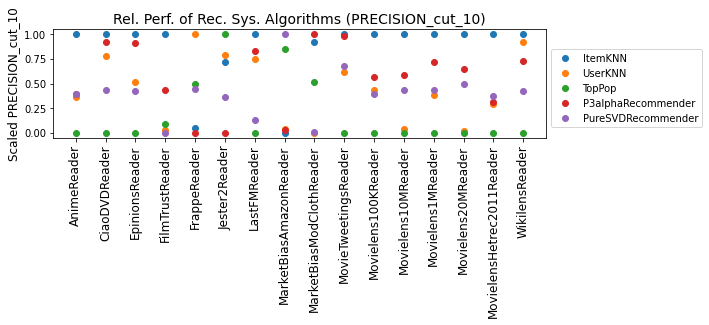

In [8]:
## dot plots of performance of ~5 algos on each dataset

print('metric is', metric)

#full_algs = ['ItemKNN', 'SLIM_BPR_Cython', 'RP3betaRecommender', 'P3alphaRecommender', 'UserKNN', 'SLIMElasticNetRecommender', 'EASE_R_Recommender', 'PureSVDRecommender', 'TopPop', 'Mult_VAE_RecommenderWrapper', 'IALSRecommender', 'NMFRecommender', 'MatrixFactorization_FunkSVD_Cython', 'MatrixFactorization_BPR_Cython', 'MatrixFactorization_AsySVD_Cython', 'GlobalEffects', 'Random', 'SlopeOne']
algs = ['ItemKNN', 'UserKNN', 'TopPop', 'P3alphaRecommender', 'PureSVDRecommender']
plot_width = .42 * len(meta_dataset.groupby("dataset_name"))
fig, ax = plt.subplots(figsize=(plot_width,2))

width = 0
datasets = []
for dataset_name, dataset_performance in meta_dataset.groupby("dataset_name"):
    perfs = []
    for alg in algs:
        #print(dataset_name, alg)
        #print(dataset_performance[["alg_name", "max_test_metric_" + metric]])
        perf = dataset_performance.loc[dataset_performance["alg_name"] == alg]["max_test_metric_" + metric]
        #print(len(perf))
        if len(perf) > 0:
            perfs.append(perf.iloc[0])

    if len(perfs) < len(algs):
        print('dataset failed:', dataset_name, len(perfs), '/', len(algs))
        continue
    
    # now scale the values in [0,1]
    min_perf, max_perf = np.min(perfs), np.max(perfs)
    perfs = [(p - min_perf) / (max_perf - min_perf) for p in perfs]
    datasets.append(dataset_name)
    
    width += 1
    for i, alg in enumerate(algs):
        color = default_colors[i]
        if width == 1:
            ax.scatter(width, perfs[i], label=alg, color=color, marker='o')
        else:
            ax.scatter(width, perfs[i], color=color, marker='o')
            
ax.legend(loc=(1.01,.1))
ax.set_xticklabels(datasets, fontsize=12, rotation=90)
ax.set_xticks(range(1, len(datasets)+1))
ax.set_ylabel('Scaled '+metric, fontsize=12)   

#ax.set_title('Scaled Spearman Rank Correlation of Performance Predictors', fontsize=14)
ax.set_title('Rel. Perf. of Rec. Sys. Algorithms ('+metric+')', fontsize=14)

save = False
if save:
    plt.savefig(result_folder + save, bbox_inches = 'tight', pad_inches = 0.1)


dataset failed: BookCrossingReader 7 / 18
dataset failed: DatingReader 5 / 18
dataset failed: GowallaReader 4 / 18
dataset failed: Movielens20MReader 7 / 18
dataset failed: NetflixPrizeReader 4 / 18
dataset failed: RecipesReader 7 / 18


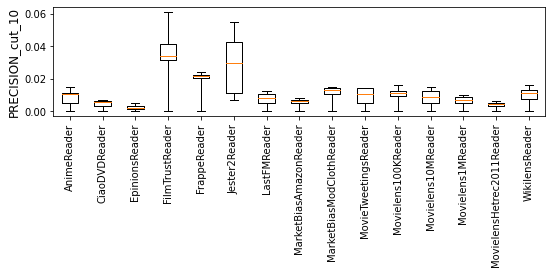

In [9]:
# box plots of performance across all algs on each dataset

full_algs = ['ItemKNN', 'SLIM_BPR_Cython', 'RP3betaRecommender', 'P3alphaRecommender', 'UserKNN', 'SLIMElasticNetRecommender', 'EASE_R_Recommender', 'PureSVDRecommender', 'TopPop', 'Mult_VAE_RecommenderWrapper', 'IALSRecommender', 'NMFRecommender', 'MatrixFactorization_FunkSVD_Cython', 'MatrixFactorization_BPR_Cython', 'MatrixFactorization_AsySVD_Cython', 'GlobalEffects', 'Random', 'SlopeOne']
threshold = len(full_algs) / 2

plot_width = .42 * len(meta_dataset.groupby("dataset_name"))
fig, ax = plt.subplots(figsize=(plot_width,2))

width = 0
datasets = []
boxplot_data = []
for dataset_name, dataset_performance in meta_dataset.groupby("dataset_name"):
    perfs = []
    for alg in full_algs:
        perf = dataset_performance.loc[dataset_performance["alg_name"] == alg]["max_test_metric_" + metric]
        if len(perf) > 0:
            perfs.append(perf.iloc[0])

    if len(perfs) < threshold:
        print('dataset failed:', dataset_name, len(perfs), '/', len(full_algs))
        continue
    
    datasets.append(dataset_name)
    
    width += 1
    #np.percentile(val_accs, 25), 
    #np.median(val_accs), 
    #np.percentile(val_accs, 75)

    boxes = {
        'label' : dataset_name,
        'whislo': min(perfs),
        'q1'    : np.percentile(perfs, 25),
        'med'   : np.median(perfs),
        'q3'    : np.percentile(perfs, 75),
        'whishi': max(perfs),
        'fliers': []
    }
    boxplot_data.append(boxes)        
        
        
        
#ax.scatter(width, perfs[i], label=alg, color=color, marker='o')

ax.bxp(boxplot_data)


plt.xticks(rotation = 90)
ax.set_ylabel(metric, fontsize=12)   
save = False
if save:
    plt.savefig(result_folder + save, bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
#### done
# highest correlations between algorithm performance and individual meta-features
# correlation between hardness=max_algos(metric) on each dataset, and all meta-features
# dot plots of performance of ~5 algos on each dataset
# box plots of performance across all algs on each dataset

#### planned

# with hyperparam data - HPO transfer matrices https://arxiv.org/pdf/2201.13396.pdf

# table of avg rankings of the algs
# plot of #users, #items, #interactions ?

# mutual satisfiability of different metrics ---- think about something interesting that studies relns between metrics
# for example, matrix where the rows/cols are metrics, and entry (i,j) is the corr of metric i with metric j averaged over all algos/datasets


In [ ]:
# notes

# meta_dataset
# 253 rows: row is dataset x alg
# 665 columns: test_metric and meta-features

# metafeats
#[759 rows x 1049 columns]
# rows: dataset x alg
# columns: test metrics and meta-features